In [1]:
%matplotlib inline


# Measure  region geometrical properties


This example shows how to measure properties of labelled image regions. We
analyze an image with two ellipses.


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)

We use the :py:func:`skimage.measure.regionprops` result to draw certain
properties on each region. For example, in red, we plot the major and minor
axes of each ellipse.



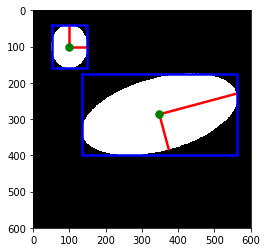

In [2]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

We use the :py:func:`skimage.measure.regionprops_table` to compute
(selected) properties for each region. Note that
``skimage.measure.regionprops_table`` actually computes the properties,
whereas ``skimage.measure.regionprops`` computes them when they come in use
(lazy evaluation).
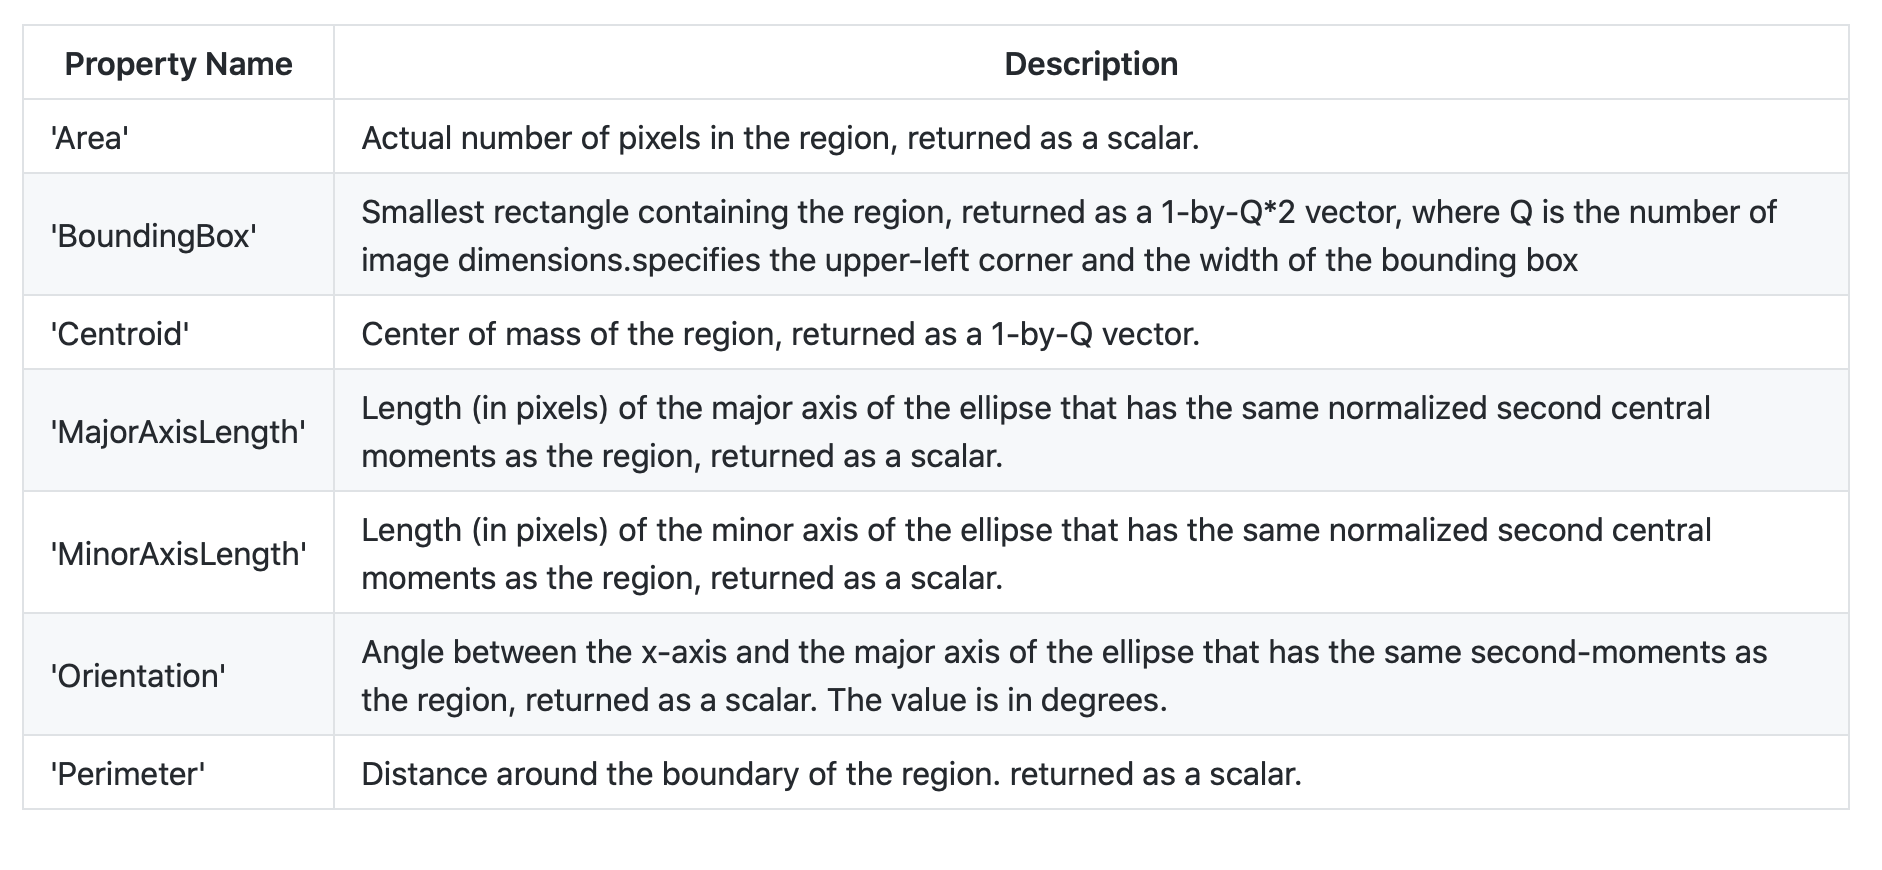



In [6]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length',
                                                 'area',
                                                 'orientation',
                                                 'perimeter'))

We now display a table of these selected properties (one region per row),
the ``skimage.measure.regionprops_table`` result being a pandas-compatible
dict.



In [7]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,area,perimeter
0,100,100,0.000000,119.807049,99.823995,9393,361.705627
1,286,348,-1.308966,440.015503,199.918850,69088,1162.342279
